## Import Library
Import pustaka yang diperlukan untuk analisis data, manipulasi data, dan visualisasi.

In [1997]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset
Memuat data dari file CSV dan menampilkan lima baris pertama untuk memahami struktur data.

In [1998]:
df = pd.read_csv("dataset/car_data.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Cleaning
Menghapus kolom yang tidak relevan (`Car_Name`) dan memeriksa statistik deskriptif dari dataset.

In [1999]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [2000]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [2001]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


## Exploratory Data Analysis (EDA)
Visualisasi hubungan antara beberapa fitur seperti `Year`, `Kms_Driven`, dan `Selling_Price`.

Text(0, 0.5, 'Price in thousand dollars ($)')

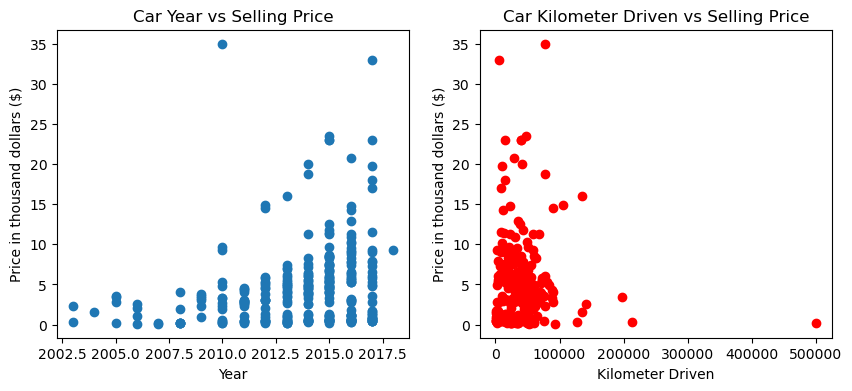

In [2002]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df['Year'],df['Selling_Price'])
plt.title("Car Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Price in thousand dollars ($)")

plt.subplot(1,2,2)
plt.scatter(df['Kms_Driven'],df['Selling_Price'],color='r')
plt.title("Car Kilometer Driven vs Selling Price")
plt.xlabel("Kilometer Driven")
plt.ylabel("Price in thousand dollars ($)")


In [2003]:
# plt.figure(figsize=(10,4))

# plt.subplot(2,2,1)
# plt.bar(df['fuel'],df['selling_price'])
# plt.title("Fuel vs Selling Price")

# plt.subplot(2,2,2)
# plt.bar(df['seller_type'],df['selling_price'])
# plt.title("Seller Type vs Selling Price")

# plt.subplot(2,2,3)
# plt.bar(df['transmission'],df['selling_price'])
# plt.title("Transmission vs Selling Price")

# plt.subplot(2,2,3)
# plt.bar(df['owner'],df['selling_price'])
# plt.title("Owner vs Selling Price")

# plt.tight_layout()
# plt.show()

## Fitur dan Target
Membagi dataset menjadi dua yaitu fitur (X) dan target (y) 

In [2004]:
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [2005]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [2006]:
X.describe()

,Year,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189
std,2.891554,8.644115,38886.883882,0.247915
min,2003.000000,0.320000,500.000000,0.000000
25%,2012.000000,1.200000,15000.000000,0.000000
50%,2014.000000,6.400000,32000.000000,0.000000
75%,2016.000000,9.900000,48767.000000,0.000000
max,2018.000000,92.600000,500000.000000,3.000000


## Feature Engineering
Menggunakan teknik encoding (`pd.get_dummies`) untuk mengubah fitur kategorikal menjadi numerik. 

In [2007]:
X = pd.get_dummies(X)

In [2008]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,False,False,True,True,False,False,True
1,2013,9.54,43000,0,False,True,False,True,False,False,True
2,2017,9.85,6900,0,False,False,True,True,False,False,True
3,2011,4.15,5200,0,False,False,True,True,False,False,True
4,2014,6.87,42450,0,False,True,False,True,False,False,True


## Feature Scaling
Normalisasi data menggunakan Min-Max Scaling untuk memastikan semua fitur berada dalam skala yang sama.

In [2009]:
X['Year'] = (X['Year']-X['Year'].min())/(X['Year'].max()-X['Year'].min())
X['Kms_Driven'] = (X['Kms_Driven']-X['Kms_Driven'].min())/(X['Kms_Driven'].max()-X['Kms_Driven'].min())
X['Present_Price'] = (X['Present_Price']-X['Present_Price'].min())/(X['Present_Price'].max()-X['Present_Price'].min())
y = (y-y.min())/(y.max()-y.min())
pd.concat((X,y),axis=1) # Melihat hasil scaling

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Selling_Price
0,0.733333,0.057109,0.053053,0,False,False,True,True,False,False,True,0.093123
1,0.666667,0.099913,0.085085,0,False,True,False,True,False,False,True,0.133238
2,0.933333,0.103273,0.012813,0,False,False,True,True,False,False,True,0.204871
3,0.533333,0.041504,0.009409,0,False,False,True,True,False,False,True,0.078797
4,0.733333,0.070980,0.083984,0,False,True,False,True,False,False,True,0.128940
...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.866667,0.122237,0.067043,0,False,True,False,True,False,False,True,0.269341
297,0.800000,0.060468,0.119119,0,False,False,True,True,False,False,True,0.111748
298,0.400000,0.115735,0.175043,0,False,False,True,True,False,False,True,0.093123
299,0.933333,0.131990,0.017017,0,False,True,False,True,False,False,True,0.326648


## Loss Function dan Gradient Descent
Implementasi fungsi `mean_squared_error` untuk menghitung kesalahan prediksi, serta `gradient_descent` untuk mengoptimalkan parameter model.

In [2010]:
import numpy as np

def mean_squared_error(X, y, w, b):
    # Hitung prediksi
    prediction = np.dot(X, w) + b  # Tidak perlu transpose karena X adalah matriks
    # Hitung error rata-rata kuadrat
    error = np.mean((prediction - y) ** 2) / 2  # Faktor 1/2 untuk gradient descent
    return error

def hitung_gradient(X, y, w, b):
    m = len(y)  # Jumlah data
    # Hitung prediksi
    prediction = np.dot(X, w) + b
    # Error antara prediksi dan target
    errors = prediction - y
    # Gradien terhadap w
    dj_dw = np.dot(X.T, errors) / m
    # Gradien terhadap b
    dj_db = np.mean(errors)
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, epochs=500, alpha=0.01):
    # Make sure w and b are numpy arrays (or scalars)
    w_baru = w
    b_baru = b
    loss_hist = []
    
    for i in range(epochs):
        # Hitung gradien
        dj_dw, dj_db = hitung_gradient(X, y, w_baru, b_baru)
        # Update parameter
        w_baru = w_baru - alpha * dj_dw
        b_baru = b_baru - alpha * dj_db
        # Hitung loss
        loss = mean_squared_error(X, y, w_baru, b_baru)
        loss_hist.append(loss)
        
        if i % 2500 == 0:  # Cetak loss setiap 100 epoch
            print(f"Epoch {i}, Loss: {loss}")
    
    print(f"Final Loss: {loss}")
    return loss_hist, w_baru, b_baru


## Train-Test Split
Membagi data tadi menjadi data pelatihan dan pengujian untuk mengevaluasi performa model.

In [2011]:
X = np.array(X)
y = np.array(y)
X_train = X[:int(len(X)*0.9)]
X_test = X[int(len(X)*0.9):]

y_train = y[:int(len(y)*0.9)]
y_test = y[int(len(y)*0.9):]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(270, 11) (31, 11)
(270,) (31,)


## Model Training - Linear Regression
Melatih model regresi linier menggunakan gradient descent dan mengevaluasi performa model menggunakan visualisasi prediksi.

In [2012]:
w_linreg = np.zeros(X_train.shape[1])
b_linreg = 0
lin_reg_loss_hist,w_linreg,b_linreg = gradient_descent(X_train,y_train,w_linreg,b_linreg,epochs=20000,alpha=0.05)

Epoch 0, Loss: 0.01661045225171222
Epoch 2500, Loss: 0.002278788910594619
Epoch 5000, Loss: 0.0016089002026888593
Epoch 7500, Loss: 0.0014196321765480168
Epoch 10000, Loss: 0.0013660127210474763
Epoch 12500, Loss: 0.0013508069901124382
Epoch 15000, Loss: 0.001346492036474247
Epoch 17500, Loss: 0.0013452667570215096
Final Loss: 0.0013449186103398297


In [2013]:
prediksi = np.dot(w_linreg, X_test.T) + b_linreg
target = y_test

Visualisasi dan Evaluasi Hasil

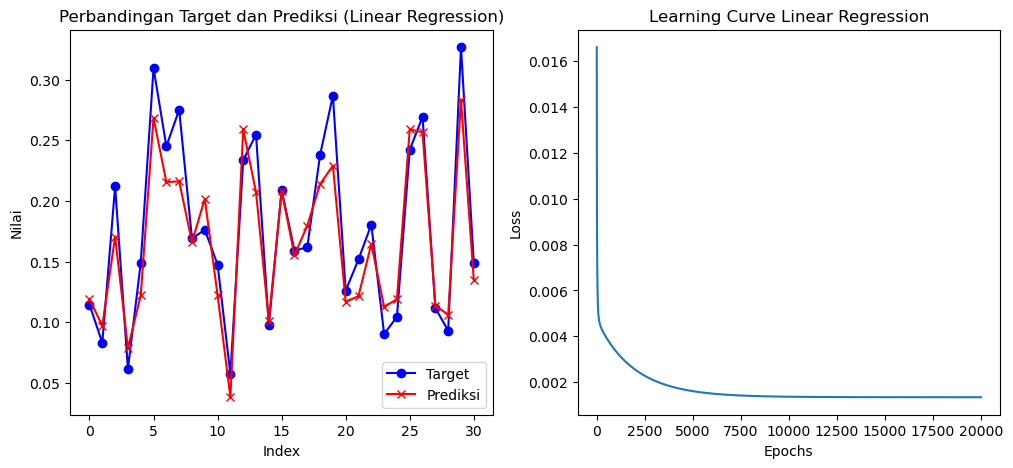

In [2014]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

plt.plot(target, label='Target', marker='o', color='b')
plt.plot(prediksi, label='Prediksi', marker='x', color='r')
plt.xlabel('Index')
plt.ylabel('Nilai')
plt.title('Perbandingan Target dan Prediksi (Linear Regression)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(lin_reg_loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve Linear Regression')
plt.show()

plt.show()

## Model Training - Polynomial Regression
Melatih model dengan fitur polinomial untuk meningkatkan akurasi prediksi. 

In [2015]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4,include_bias=False)
X_train_polynomial = poly.fit_transform(X_train)
X_test_polynomial = poly.fit_transform(X_test)
X_train_polynomial.shape,X_test_polynomial.shape

((270, 1364), (31, 1364))

In [2016]:
w_poly_reg = np.zeros(X_train_polynomial.shape[1])
b_poly_reg = 0
poly_reg_loss_hist,w_poly_reg,b_poly_reg = gradient_descent(X_train_polynomial,y_train,w_poly_reg,b_poly_reg,epochs=20000,alpha=0.05)

Epoch 0, Loss: 0.009272938820716337
Epoch 2500, Loss: 0.00040899806772900826
Epoch 5000, Loss: 0.0003276049452454098
Epoch 7500, Loss: 0.0002866290303496638
Epoch 10000, Loss: 0.00025977798550276814
Epoch 12500, Loss: 0.00024031938208799144
Epoch 15000, Loss: 0.00022543256289993222
Epoch 17500, Loss: 0.00021363657154722465
Final Loss: 0.00020404934670229408


In [2017]:
prediksi = np.dot(w_poly_reg, X_test_polynomial.T) + b_poly_reg
target = y_test

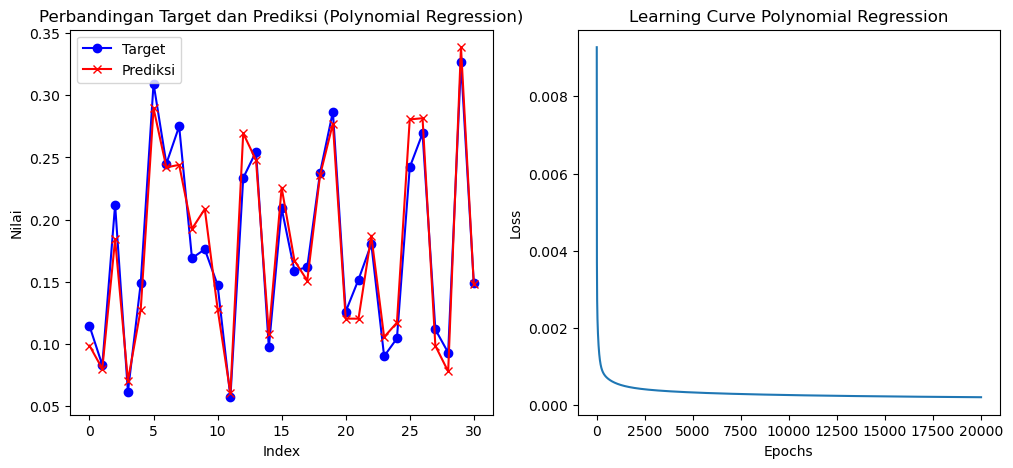

In [2018]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

plt.plot(target, label='Target', marker='o', color='b')
plt.plot(prediksi, label='Prediksi', marker='x', color='r')
plt.xlabel('Index')
plt.ylabel('Nilai')
plt.title('Perbandingan Target dan Prediksi (Polynomial Regression)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(poly_reg_loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve Polynomial Regression')
plt.show()

plt.show()

## Save Model dalam Format JSON
Menyimpan model yang sudah dibuat dalam format JSON


In [2025]:
import json

model_params_linear = {"weights": w_linreg.tolist(), "bias":b_linreg}

with open("saved_model/linear_model.json","w") as file:
    json.dump(model_params_linear, file)

model_params_polynomial = {"weights": w_poly_reg.tolist(), "bias":b_linreg}

with open("saved_model/polynomial_model.json","w") as file:
    json.dump(model_params_polynomial, file)

print("Model sudah disimpan!")

Model sudah disimpan!
